In [1]:
import pydicom #read dicom files
import os
import pandas as pd

In [2]:
data_dir = 'C:/Users/casti/Documents/Final_Project/FFE_imagesOversampling/'

In [3]:
patients = os.listdir(data_dir)

In [4]:
labels_df = pd.read_csv('C:/Users/casti/Documents/Final_Project/animallist_Oversampling.csv', index_col=0)

In [5]:
labels_df.head()

,tumor_model
ID,
BN13,0
BN15A,0
BN15B,0
BN15C,0
BN15D,0


In [6]:
for patient in patients:
    label = labels_df.get_value(patient, 'tumor_model')
    path = data_dir + patient
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    print(patient, len(slices), slices[0].pixel_array.shape)
#    print(slices[0])

C:\Users\casti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


BN13 40 (192, 192)
BN15A 20 (192, 192)
BN15B 40 (192, 192)
BN15C 30 (192, 192)
BN15D 30 (192, 192)
BN17A 20 (192, 192)
BN17B 20 (192, 192)
BN19A 20 (192, 192)
BN19B 30 (192, 192)
BN20A 35 (192, 192)
BN20B 20 (192, 192)
BN21A 30 (192, 192)
BN22A 30 (192, 192)
BN23A 40 (192, 192)
BN23B 40 (192, 192)
BN24A 50 (160, 160)
BN24B 50 (160, 160)
BN24C 30 (192, 192)
BN27A 50 (192, 192)
BN27B 30 (192, 192)
BN28A 35 (192, 192)
BN28B 35 (192, 192)
BN28C 20 (192, 192)
BN29A 70 (192, 192)
BN29B 30 (224, 224)
BN30A 40 (192, 192)
BN30B 20 (192, 192)
BN30C 40 (192, 192)
BN31A 40 (192, 192)
BN31B 40 (192, 192)
BN31C 35 (192, 192)
BN31D 35 (192, 192)
BN31E 35 (160, 160)
BN31F 35 (160, 160)
BN33A 40 (192, 192)
BN33B 40 (192, 192)
BN34A 40 (192, 192)
BN34B 40 (192, 192)
BN35A 40 (192, 192)
BN35B 40 (192, 192)
BN41A 40 (192, 192)
BN41B 40 (192, 192)
BN46A 40 (192, 192)
BN46B 40 (192, 192)
BN49A 30 (192, 192)
BN50A 40 (192, 192)
BN50B 40 (192, 192)
BN51A 40 (192, 192)
BN51B 40 (192, 192)
BN52A 40 (192, 192)
B

In [7]:
slices[39].pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [8]:
IMG_PX_SIZE = 400

In [16]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
plt.rcParams['figure.figsize'] = (15.0, 15.0)

#%matplotlib inline

C:\Users\casti\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


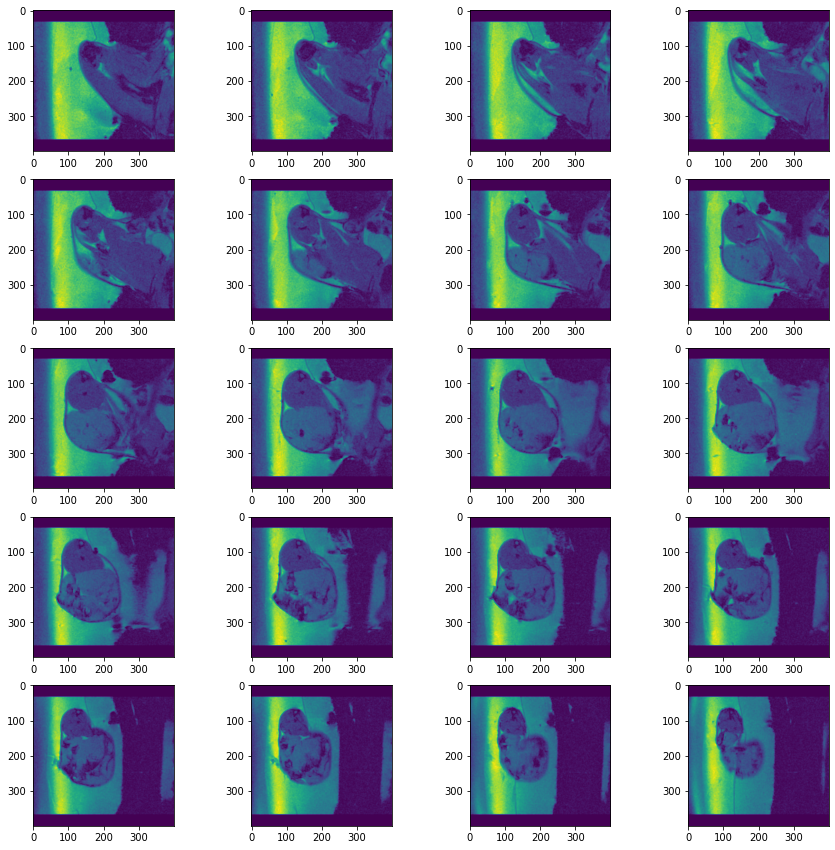

In [17]:
for patient in patients[:1]:
    label = labels_df.get_value(patient, 'tumor_model')
    path = data_dir + patient
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    
    fig=plt.figure()
    for num, each_slice in enumerate(slices[15:35]):
        y = fig.add_subplot(5,4,num+1)
        new_image=cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE))
        y.imshow(new_image)
    plt.show()